# Try forcasting Visibility ..Parameter name is " Horizontal Visibility 10 min inst"

Your inputs are: 

Air Temperature 10 min Avg
Relative Humidity 10 min avg
Wind speed m/s) at 10 m, 10 min
Global Solar Radiation 10 min average


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  # Fix the typo in DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [2]:
file_paths=[
    "C:\\Users\\hp\\Downloads\\2019_to_2020.xlsx",
    "C:\\Users\\hp\\Downloads\\2020_to_2021.xlsx",
    "C:\\Users\\hp\\Downloads\\AnalysisData 2021 to 2022.xlsx",
    "C:\\Users\\hp\\Downloads\\2022_to_2023.xlsx",
    "C:\\Users\\hp\\Downloads\\2023_to_2024.xlsx"
]

In [3]:
# Read each Excel file into a separate DataFrame
dfs = [pd.read_excel(file_path) for file_path in file_paths]


In [4]:
# Concatenate the DataFrames into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

In [5]:
data

,Time,Air Temperature 10 min Avg,Global Solar Radiation 10 min average,Horizontal Visibility 10 min inst,Relative Humidity 10 min avg,"Wind speed (m/s) at 10 m, 10 min avg"
0,11/11/2019 06:00:00,26.2,630.1,7.08,62.1,1.7
1,11/11/2019 06:10:00,26.7,626.6,6.84,60.8,1.6
2,11/11/2019 06:20:00,26.7,646.8,7.58,61.7,2.1
3,11/11/2019 06:30:00,26.7,659.2,5.34,60.9,1.9
4,11/11/2019 06:40:00,26.9,654.5,1.39,60.4,2.1
...,...,...,...,...,...,...
202040,12/31/2023 23:20:00,12.7,0.0,8.72,98.8,1.2
202041,12/31/2023 23:30:00,12.7,0.0,7.54,98.6,1.4
202042,12/31/2023 23:40:00,12.6,0.0,7.13,98.1,0.7
202043,12/31/2023 23:50:00,12.6,0.0,9.73,98.5,1.4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202045 entries, 0 to 202044
Data columns (total 6 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Time                                   202045 non-null  object 
 1   Air Temperature 10 min Avg             197963 non-null  float64
 2   Global Solar Radiation 10 min average  196849 non-null  float64
 3   Horizontal Visibility 10 min inst      196042 non-null  float64
 4   Relative Humidity 10 min avg           196843 non-null  float64
 5   Wind speed (m/s) at 10 m, 10 min avg   189111 non-null  float64
dtypes: float64(5), object(1)
memory usage: 9.2+ MB


In [7]:


data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %H:%M:%S')

# Set 'Time' as the index
data.set_index('Time', inplace=True)

In [8]:
data

,Air Temperature 10 min Avg,Global Solar Radiation 10 min average,Horizontal Visibility 10 min inst,Relative Humidity 10 min avg,"Wind speed (m/s) at 10 m, 10 min avg"
Time,,,,,
2019-11-11 06:00:00,26.2,630.1,7.08,62.1,1.7
2019-11-11 06:10:00,26.7,626.6,6.84,60.8,1.6
2019-11-11 06:20:00,26.7,646.8,7.58,61.7,2.1
2019-11-11 06:30:00,26.7,659.2,5.34,60.9,1.9
2019-11-11 06:40:00,26.9,654.5,1.39,60.4,2.1
...,...,...,...,...,...
2023-12-31 23:20:00,12.7,0.0,8.72,98.8,1.2
2023-12-31 23:30:00,12.7,0.0,7.54,98.6,1.4
2023-12-31 23:40:00,12.6,0.0,7.13,98.1,0.7


# Example 1: Time Series Plot

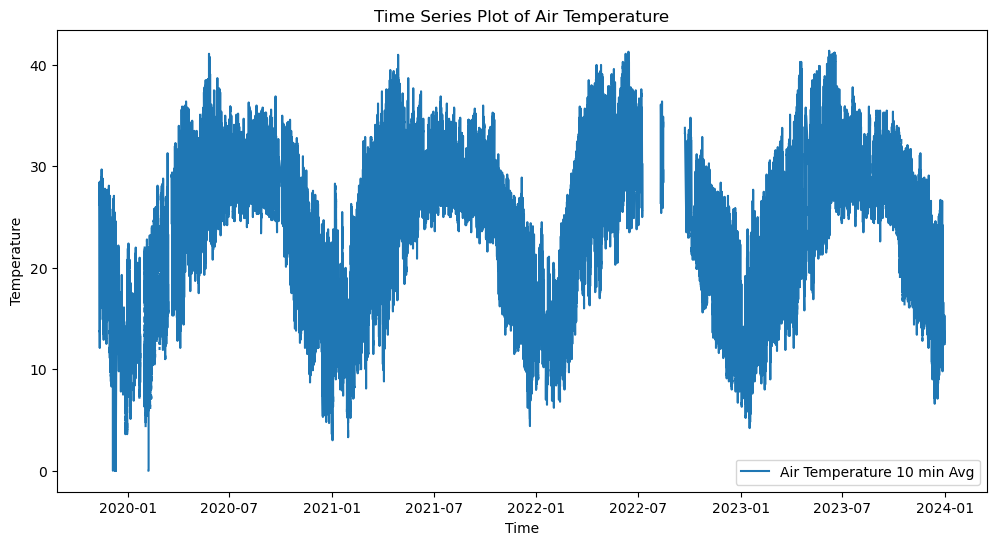

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['Air Temperature 10 min Avg'], label='Air Temperature 10 min Avg')
plt.title('Time Series Plot of Air Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Example 2: Scatter Plot

In [10]:
import seaborn as sns

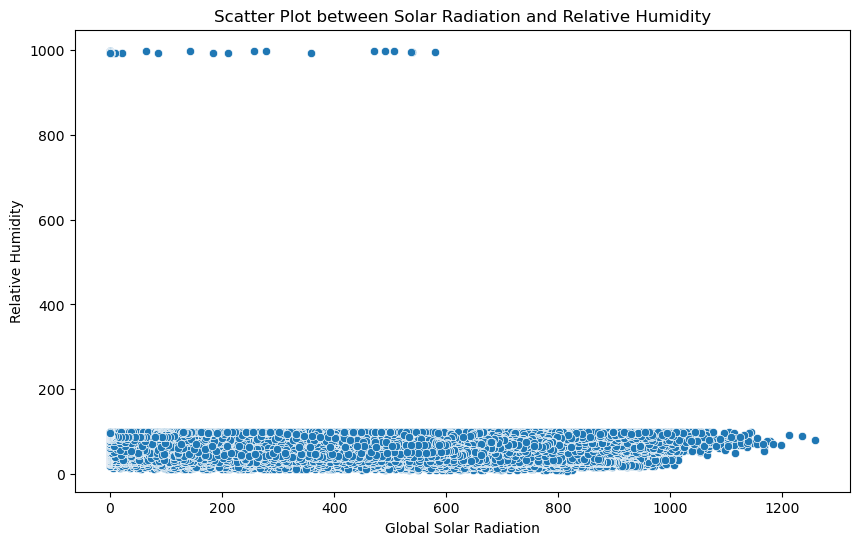

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Global Solar Radiation 10 min average', y='Relative Humidity 10 min avg', data=data)
plt.title('Scatter Plot between Solar Radiation and Relative Humidity')
plt.xlabel('Global Solar Radiation')
plt.ylabel('Relative Humidity')
plt.show()

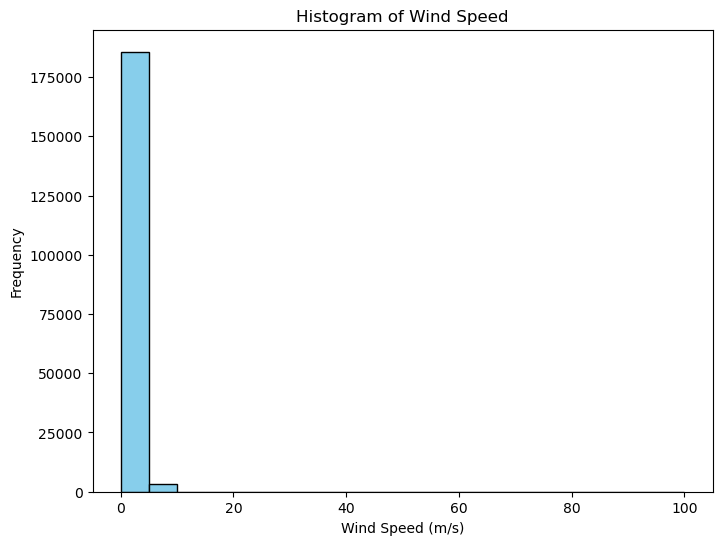

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(data['Wind speed (m/s) at 10 m, 10 min avg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

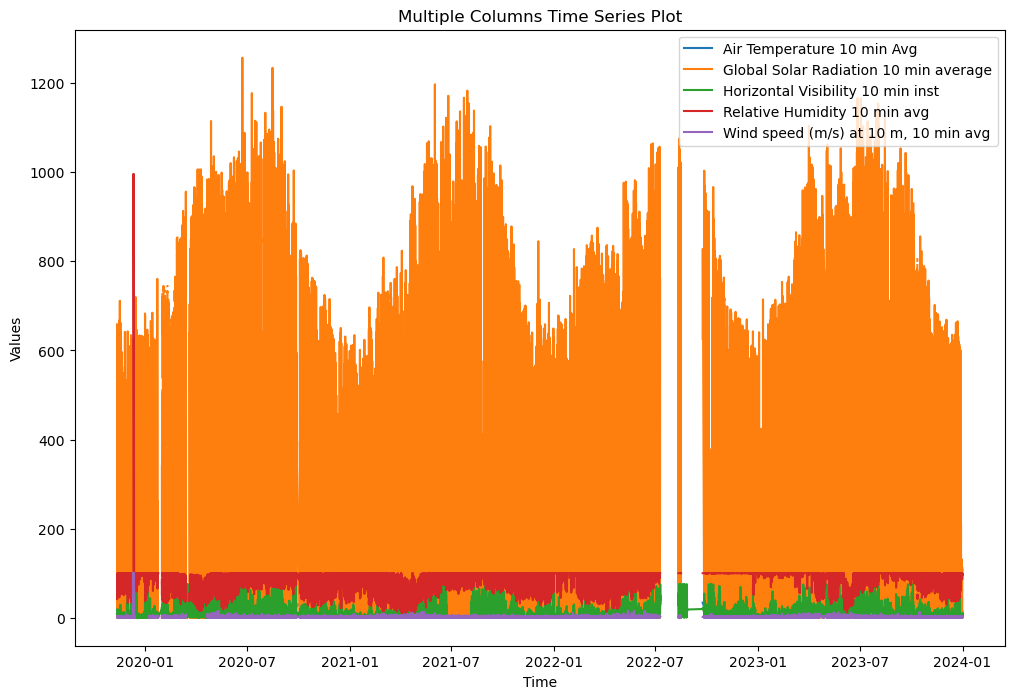

In [13]:
plt.figure(figsize=(12, 8))

plt.plot(data['Air Temperature 10 min Avg'], label='Air Temperature 10 min Avg')
plt.plot(data['Global Solar Radiation 10 min average'], label='Global Solar Radiation 10 min average')
plt.plot(data['Horizontal Visibility 10 min inst'], label='Horizontal Visibility 10 min inst')
plt.plot(data['Relative Humidity 10 min avg'], label='Relative Humidity 10 min avg')
plt.plot(data['Wind speed (m/s) at 10 m, 10 min avg'], label='Wind speed (m/s) at 10 m, 10 min avg')

plt.title('Multiple Columns Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Example:3 Heatmap

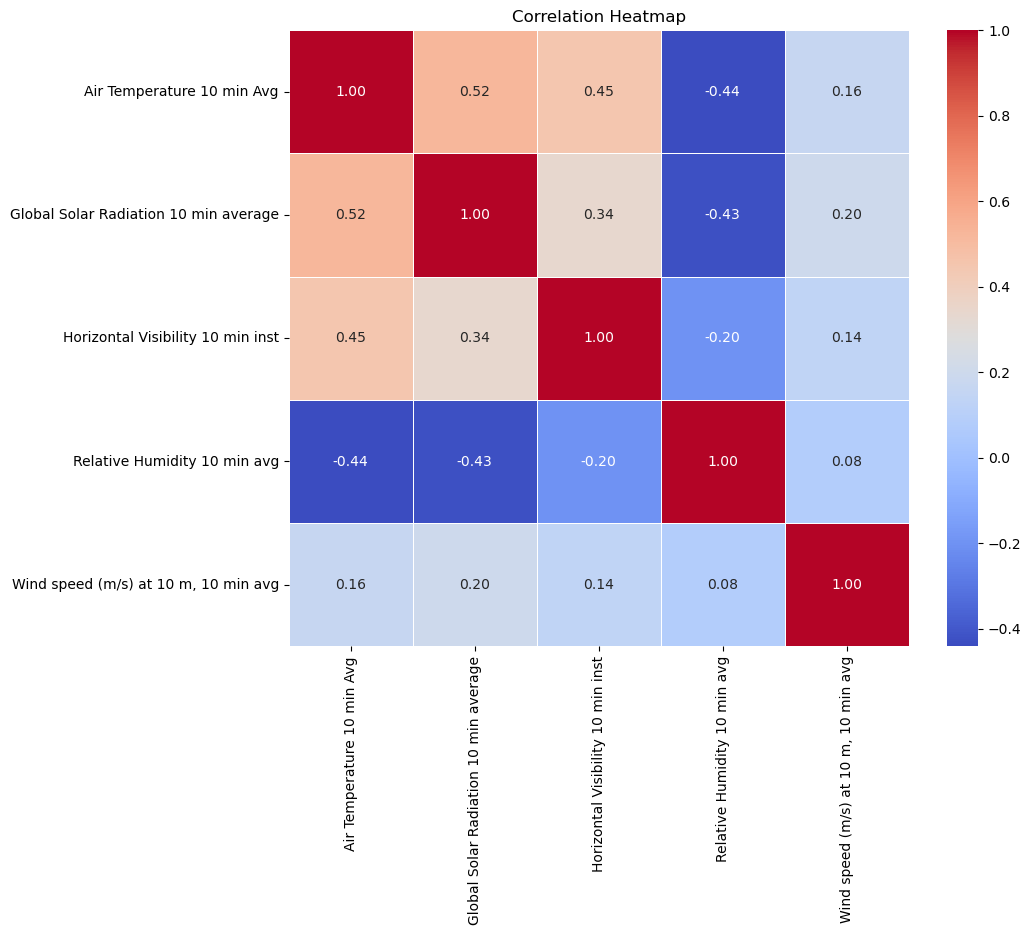

In [14]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



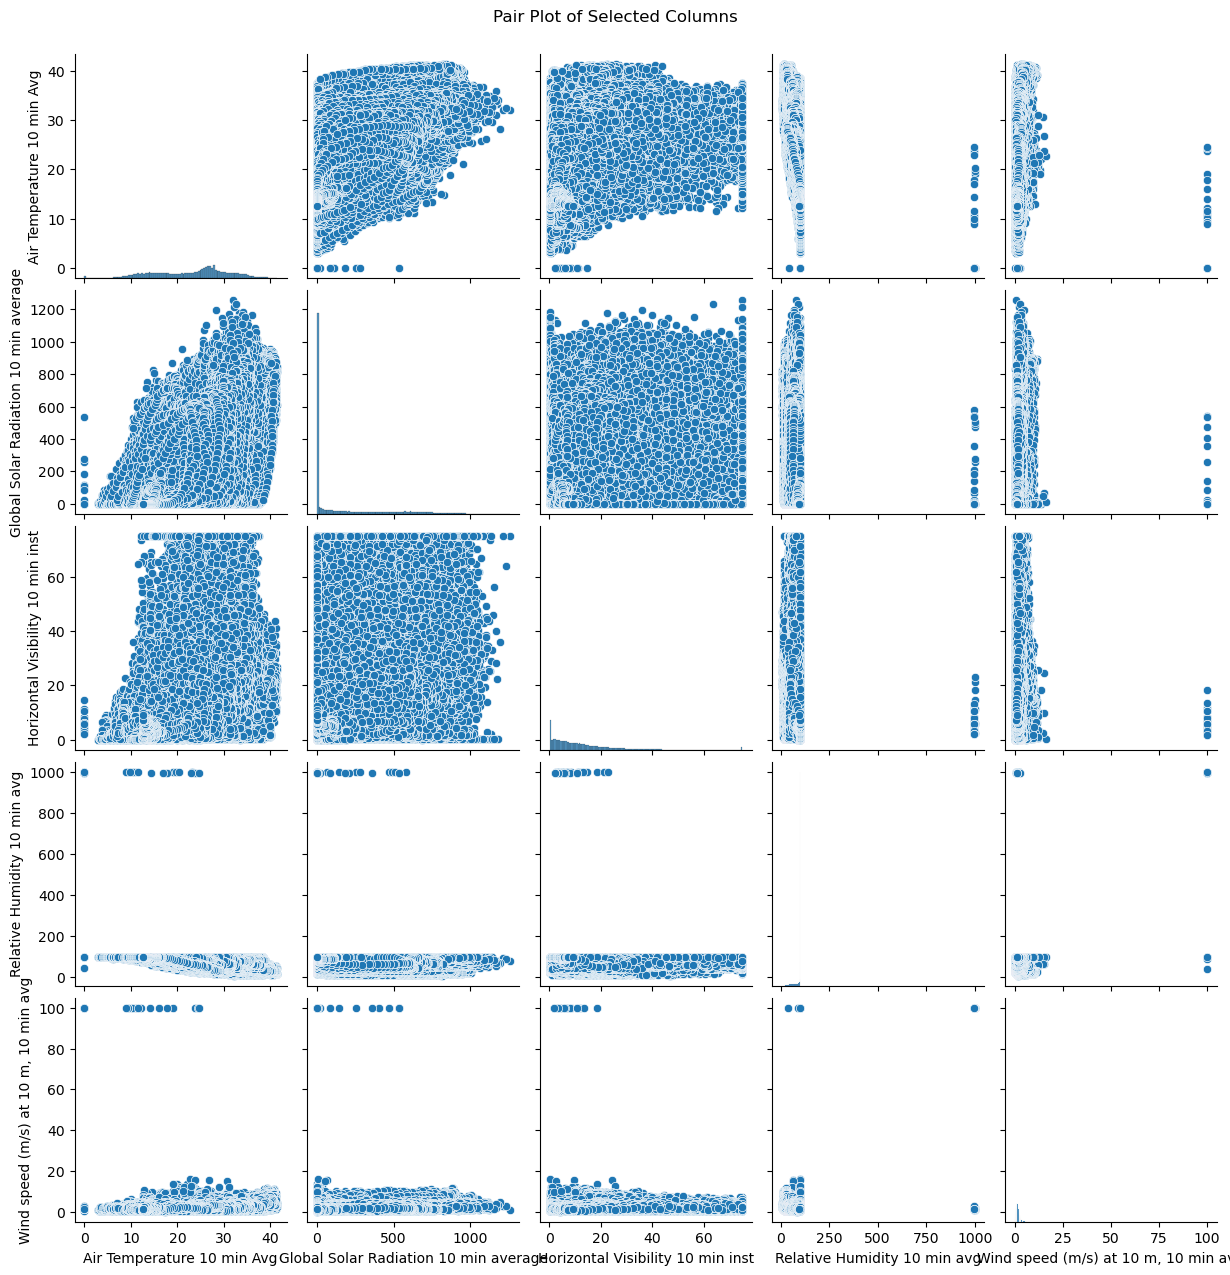

In [15]:
import seaborn as sns

# Assuming 'data' is your DataFrame
# Replace 'data' with your actual DataFrame name


# Reset the index
data.reset_index(inplace=True)

# Choose columns for the pair plot
columns_for_pair_plot = ['Air Temperature 10 min Avg', 'Global Solar Radiation 10 min average', 'Horizontal Visibility 10 min inst', 'Relative Humidity 10 min avg', 'Wind speed (m/s) at 10 m, 10 min avg']

# Create a pair plot
sns.pairplot(data[columns_for_pair_plot])
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()


In [16]:

data.isna().sum()

Time                                         0
Air Temperature 10 min Avg                4082
Global Solar Radiation 10 min average     5196
Horizontal Visibility 10 min inst         6003
Relative Humidity 10 min avg              5202
Wind speed (m/s) at 10 m, 10 min avg     12934
dtype: int64

In [17]:
data_filled = data.fillna(0)

In [18]:
data_filled.isna().sum()

Time                                     0
Air Temperature 10 min Avg               0
Global Solar Radiation 10 min average    0
Horizontal Visibility 10 min inst        0
Relative Humidity 10 min avg             0
Wind speed (m/s) at 10 m, 10 min avg     0
dtype: int64

In [19]:
data['Air Temperature 10 min Avg'].value_counts()

26.7    1590
26.6    1566
26.8    1565
26.4    1539
26.5    1537
        ... 
41.3       3
3.5        2
3.1        2
3.0        2
41.4       2
Name: Air Temperature 10 min Avg, Length: 385, dtype: int64

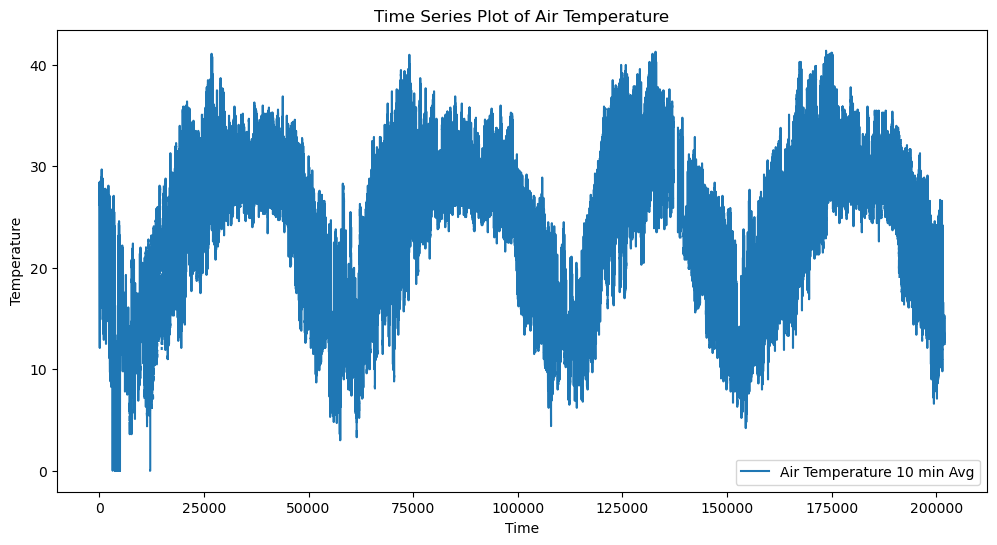

In [20]:
import matplotlib.pyplot as plt


# Plotting a time series for 'Air Temperature 10 min Avg'
plt.figure(figsize=(12, 6))
plt.plot(data['Air Temperature 10 min Avg'], label='Air Temperature 10 min Avg')
plt.title('Time Series Plot of Air Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [21]:
# Convert the 'Time' column to datetime format
def preprocess_inputs(data):
    data = data.copy()


    data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %H:%M:%S')

    data['Year']=data['Time'].apply(lambda x:x.year)
    data['Month']=data['Time'].apply(lambda x:x.month)
    data['Day']=data['Time'].apply(lambda x:x.day)
    data['Hour']=data['Time'].apply(lambda x:x.hour)

    data = data.drop('Time',axis=1)
    
    #Split the data into X and y
    y = data['Horizontal Visibility 10 min inst'] . copy()
    X = data.drop('Horizontal Visibility 10 min inst',axis=1).copy() 
    
    #Train_test_split
    X_train, X_test , y_train, y_test = train_test_split(X,y , train_size=0.7,random_state=123)
    
    #Scale X with a standardscaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train) ,columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test) ,columns=X_test.columns)
    
    return X_train,X_test , y_train,y_test

In [22]:
X_train,X_test, y_train,y_test= preprocess_inputs(data)

In [23]:
X_train.var()

Air Temperature 10 min Avg               1.000007
Global Solar Radiation 10 min average    1.000007
Relative Humidity 10 min avg             1.000007
Wind speed (m/s) at 10 m, 10 min avg     1.000008
Year                                     1.000007
Month                                    1.000007
Day                                      1.000007
Hour                                     1.000007
dtype: float64

In [24]:
y_train

150553     0.19
119561     1.87
95636     51.12
50213     13.34
47556     10.61
          ...  
119906    11.22
192476    17.28
17730     10.68
28030     14.69
15725      5.11
Name: Horizontal Visibility 10 min inst, Length: 141431, dtype: float64

In [25]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\hp\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [26]:
# Assuming you have X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess_inputs(data)


In [27]:
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed


y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()



In [28]:
# Create an instance of HistGradientBoostingregressor
model= HistGradientBoostingRegressor()




In [29]:
# Fit the classifier
model.fit(X_train, y_train_imputed)

HistGradientBoostingRegressor()

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [31]:
y_pred

array([28.64368217,  4.54178971, 15.55800217, ...,  3.07316978,
        6.3941492 ,  2.29807032])

In [32]:
# Assuming y_true and y_pred are defined somewhere in your code
# Replace this with your actual data
y_true = np.array([1, 0, 1, 1, np.nan, 0, np.nan])
y_pred = np.array([1, 0, 1, 0, 1, 0, 1])


# Check for NaN values in y_true
nan_indices = np.isnan(y_true)
y_true_no_nan = y_true[~nan_indices]
y_pred_no_nan = y_pred[~nan_indices]



In [33]:
# Compute accuracy without NaN values
accuracy = accuracy_score(y_true_no_nan, y_pred_no_nan)
print("Accuracy without NaN values:", accuracy)

Accuracy without NaN values: 0.8


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_true and y_pred are your true and predicted values
mae = mean_absolute_error(y_true_no_nan, y_pred_no_nan)
rmse = mean_squared_error(y_true_no_nan, y_pred_no_nan, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.2
Root Mean Squared Error (RMSE): 0.4472135954999579


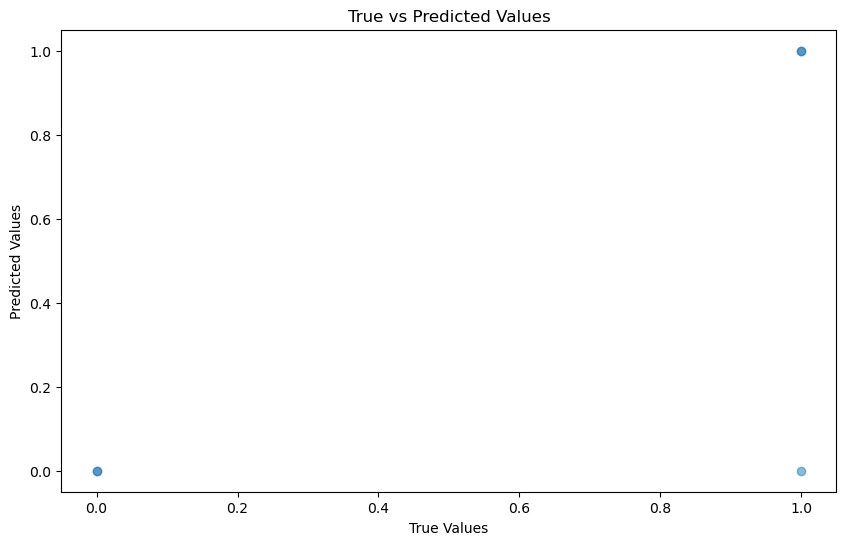

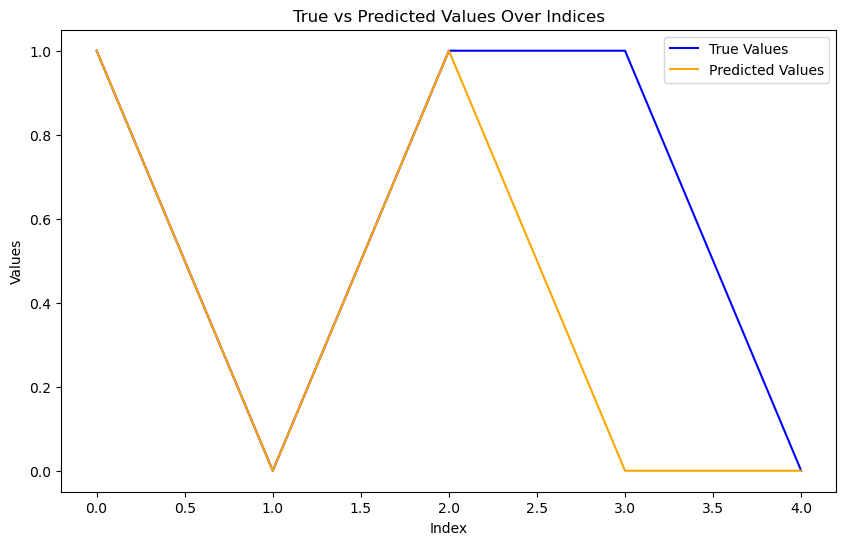

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_true_no_nan and y_pred_no_nan are your true and predicted values without NaN
plt.figure(figsize=(10, 6))

# Scatter plot for true vs predicted values
plt.scatter(y_true_no_nan, y_pred_no_nan, alpha=0.5)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Line plot for true and predicted values
plt.figure(figsize=(10, 6))

# Line plot for true values
sns.lineplot(x=range(len(y_true_no_nan)), y=y_true_no_nan, label='True Values', color='blue')

# Line plot for predicted values
sns.lineplot(x=range(len(y_pred_no_nan)), y=y_pred_no_nan, label='Predicted Values', color='orange')

plt.title('True vs Predicted Values Over Indices')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()


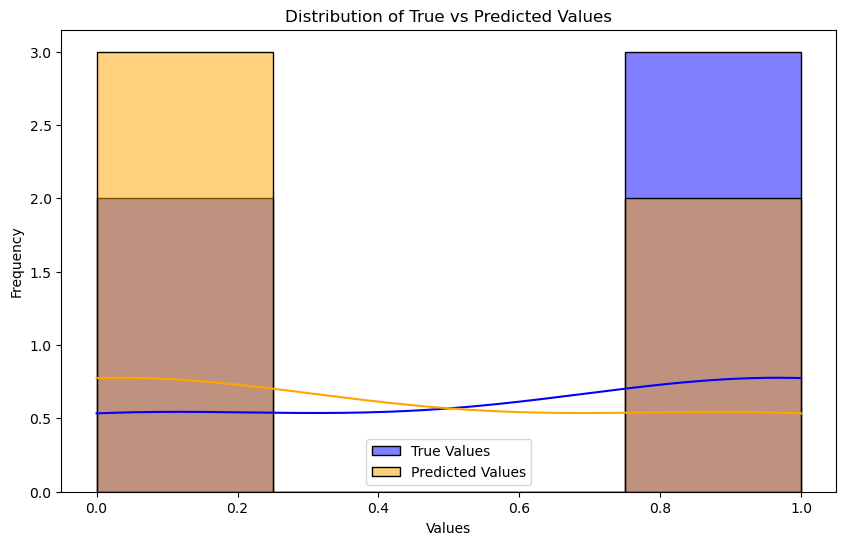

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(y_true_no_nan, label='True Values', kde=True, color='blue')
sns.histplot(y_pred_no_nan, label='Predicted Values', kde=True, color='orange')
plt.title('Distribution of True vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()



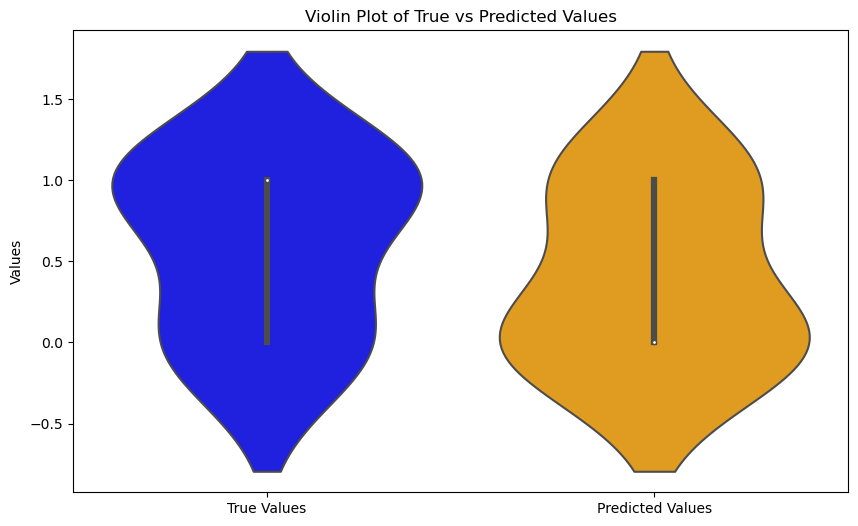

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=['True Values'] * len(y_true_no_nan) + ['Predicted Values'] * len(y_pred_no_nan),
               y=np.concatenate([y_true_no_nan, y_pred_no_nan]), palette=['blue', 'orange'])
plt.title('Violin Plot of True vs Predicted Values')
plt.ylabel('Values')
plt.show()


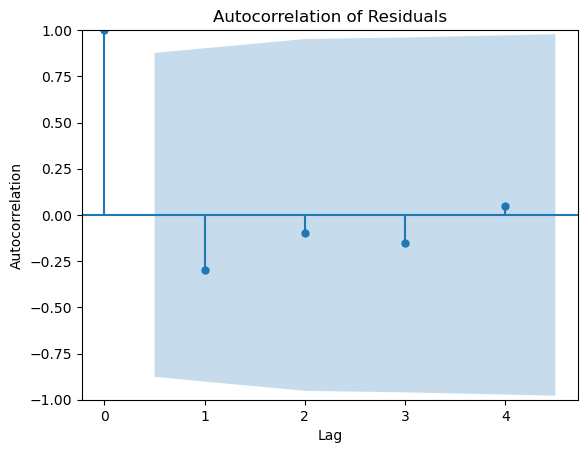

In [38]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate residuals
residuals = y_true_no_nan - y_pred_no_nan

# Plot autocorrelation function for residuals with a number of lags equal to the length of residuals
plot_acf(residuals, lags=len(residuals)-1)
plt.title('Autocorrelation of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


In [39]:
# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
accuracy = accuracy_score(y_true_no_nan, y_pred_no_nan)
precision = precision_score(y_true_no_nan, y_pred_no_nan)
recall = recall_score(y_true_no_nan, y_pred_no_nan)
conf_matrix = confusion_matrix(y_true_no_nan, y_pred_no_nan)

In [40]:
accuracy

0.8

In [41]:
precision

1.0

In [42]:
recall

0.6666666666666666

In [43]:
conf_matrix

array([[2, 0],
       [1, 2]], dtype=int64)

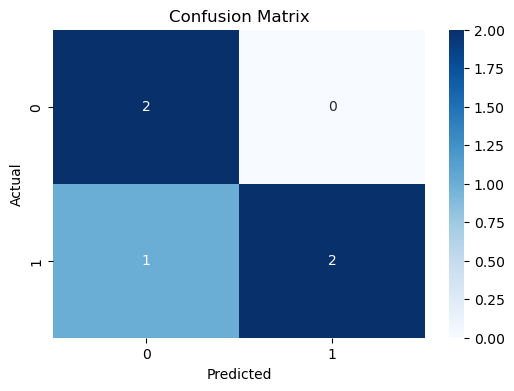

In [44]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

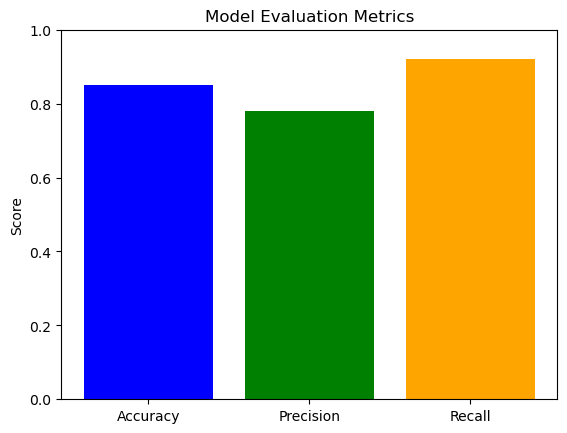

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
accuracy = 0.85
precision = 0.78
recall = 0.92

# Create a bar chart
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Set y-axis limits to represent percentage (0 to 100%)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()


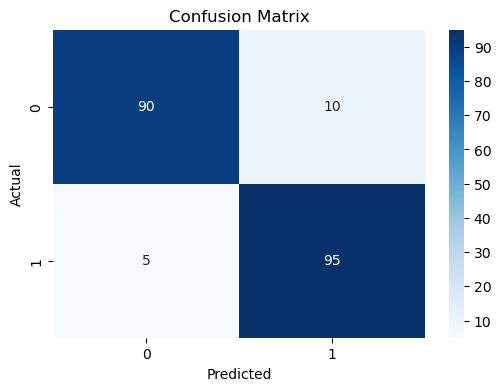

In [46]:
import seaborn as sns

# Example data (replace with your actual data)
conf_matrix = np.array([[90, 10], [5, 95]])  # Replace with your confusion matrix

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [47]:
# Compute accuracy without NaN values
accuracy = accuracy_score(y_true_no_nan, y_pred_no_nan)
print("Accuracy without NaN values:", accuracy)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_true and y_pred are your true and predicted values
mae = mean_absolute_error(y_true_no_nan, y_pred_no_nan)
rmse = mean_squared_error(y_true_no_nan, y_pred_no_nan, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Accuracy without NaN values: 0.8
Mean Absolute Error (MAE): 0.2
Root Mean Squared Error (RMSE): 0.4472135954999579


In [48]:
import pickle

# Assuming you've trained your model and stored it in hist_gradient_boosting_model
hist_gradient_boosting_model = HistGradientBoostingRegressor()
hist_gradient_boosting_model.fit(X_train, y_train_imputed)

# Save the model to a pickle file
with open('hist_gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(hist_gradient_boosting_model, file)


In [49]:
with open('hist_gradient_boosting_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [50]:
prediction=loaded_model.predict([[0,0,0,0,0,2024,1,1]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [51]:
prediction

array([16.29307285])

In [52]:
from sklearn.metrics import r2_score

# Assuming actual_values_new_data contains the actual values for your new data
actual_values_new_data = [30.4564]  # Replace with your actual values

# Calculate R-squared
r2 = r2_score(actual_values_new_data, prediction)
print("R-squared:", r2)


R-squared: nan


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [53]:
# Assuming X_train is a Pandas DataFrame
feature_names = X_train.columns
print("Feature Names:", feature_names)


Feature Names: Index(['Air Temperature 10 min Avg', 'Global Solar Radiation 10 min average',
       'Relative Humidity 10 min avg', 'Wind speed (m/s) at 10 m, 10 min avg',
       'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


In [54]:
X_train.shape[1]

8